In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the score data

data = pd.read_csv('Data/game_scores.csv')
data.head()

,Unnamed: 0,Week,Date,Season,HomeTeam,HomePoints,HomeYards,AwayTeam,AwayPoints,AwayYards,MatchString
0,0,1,2018-09-06,2018,PHI,18.0,232.0,ATL,12.0,299.0,20181ATLPHI
1,1,1,2018-09-09,2018,NO,40.0,475.0,TB,48.0,529.0,20181TBNO
2,2,1,2018-09-09,2018,BAL,47.0,369.0,BUF,3.0,153.0,20181BUFBAL
3,3,1,2018-09-09,2018,IND,23.0,380.0,CIN,34.0,330.0,20181CININD
4,4,1,2018-09-09,2018,CLE,21.0,327.0,PIT,21.0,472.0,20181PITCLE


In [3]:
# Get the values for points against the home team
home_pa = data[['HomeTeam','Season','AwayPoints']].groupby(by = ['HomeTeam', 'Season']).mean()

# Get the values for points against the away team
away_pa = data[['AwayTeam','Season','HomePoints']].groupby(by = ['AwayTeam', 'Season']).mean()

In [4]:
home_pa['HomePoints'] = away_pa['HomePoints']
home_pa['PointsAgainst'] = (home_pa['AwayPoints'] + home_pa['HomePoints'])/2

# Drop individual points for home and away
home_pa = home_pa.drop(columns = ['AwayPoints', 'HomePoints']).reset_index()
home_pa

,HomeTeam,Season,PointsAgainst
0,ARI,2018,26.5625
1,ARI,2019,27.6250
2,ARI,2020,22.9375
3,ARI,2021,18.9000
4,ATL,2018,26.4375
...,...,...,...
123,TEN,2021,23.2000
124,WAS,2018,22.4375
125,WAS,2019,27.1875
126,WAS,2020,20.5625


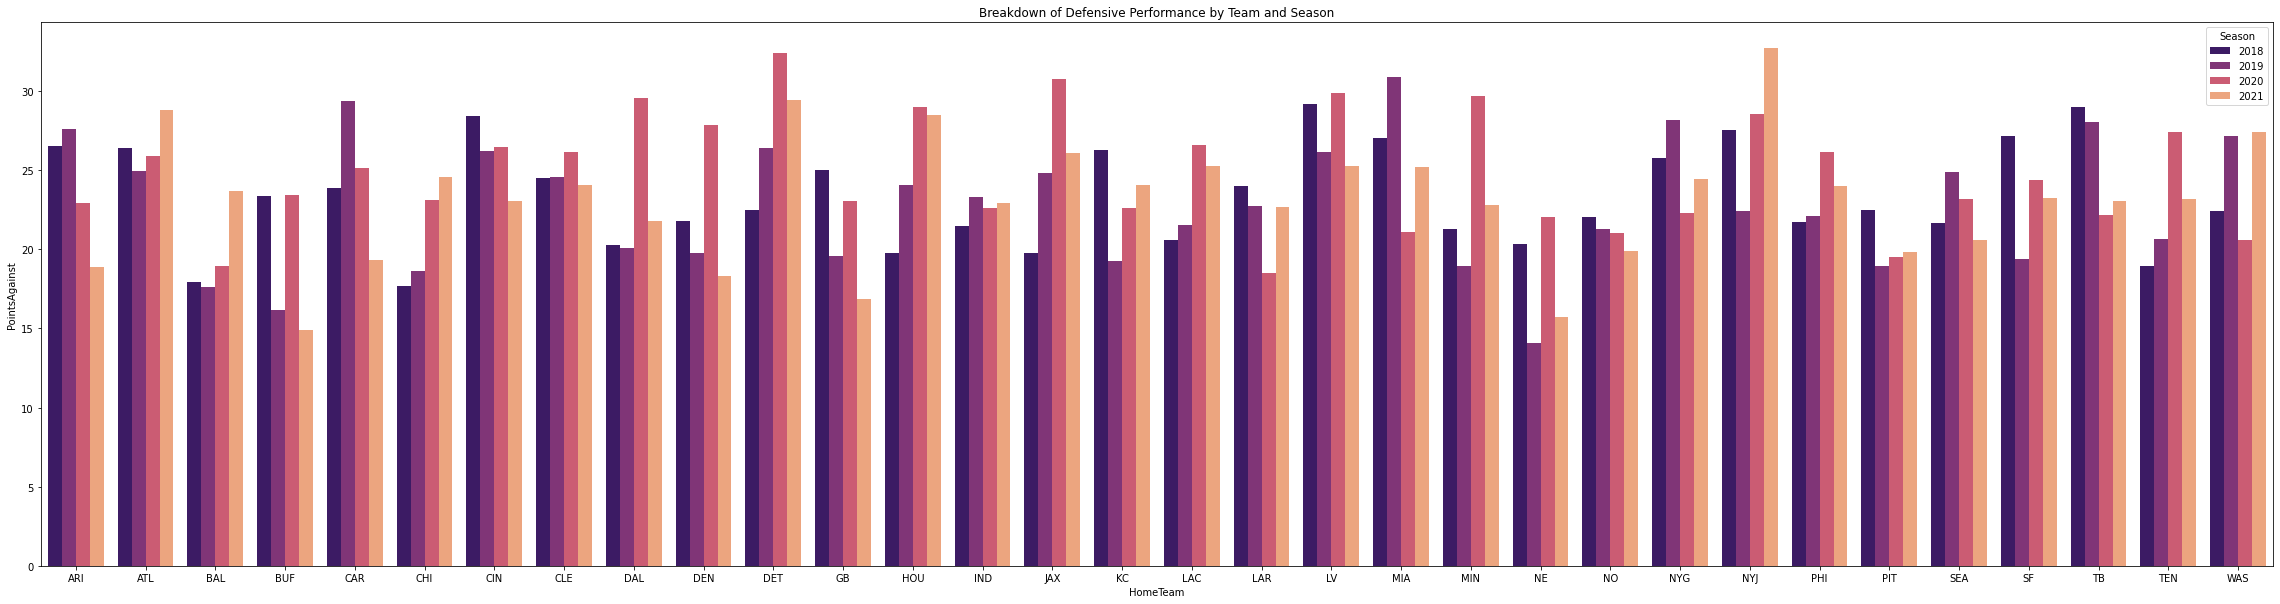

In [5]:
plt.figure(figsize = (40, 10))

sns.barplot(x = home_pa['HomeTeam'],
           y = home_pa.PointsAgainst,
           data = home_pa,
           hue = home_pa['Season'],
           palette = 'magma')

plt.title('Breakdown of Defensive Performance by Team and Season')
plt.show()

We can see in the above chart that team defensive performance can vary quite substantially over the course of the season.  As such, it would not be sufficient for our model to just impute an average defensive score for each team through the dataset.  So we will break these stats down and by season and apply a seasonal defensive average for every opponent. <br><br>

In [6]:
# Get the values for points for the home team
home_pf = data[['HomeTeam','Season','HomePoints']].groupby(by = ['HomeTeam', 'Season']).mean()

# Get the values for points for the away team
away_pf = data[['AwayTeam','Season','AwayPoints']].groupby(by = ['AwayTeam', 'Season']).mean()

In [7]:
home_pf['AwayPoints'] = away_pf['AwayPoints']
home_pf['PointsFor'] = (home_pf['AwayPoints'] + home_pf['HomePoints'])/2

# Drop individual points for home and away
home_pf = home_pf.drop(columns = ['AwayPoints', 'HomePoints']).reset_index()
home_pf

,HomeTeam,Season,PointsFor
0,ARI,2018,14.0625
1,ARI,2019,22.5625
2,ARI,2020,25.6250
3,ARI,2021,28.7000
4,ATL,2018,25.8750
...,...,...,...
123,TEN,2021,27.8000
124,WAS,2018,17.5625
125,WAS,2019,16.6250
126,WAS,2020,20.9375


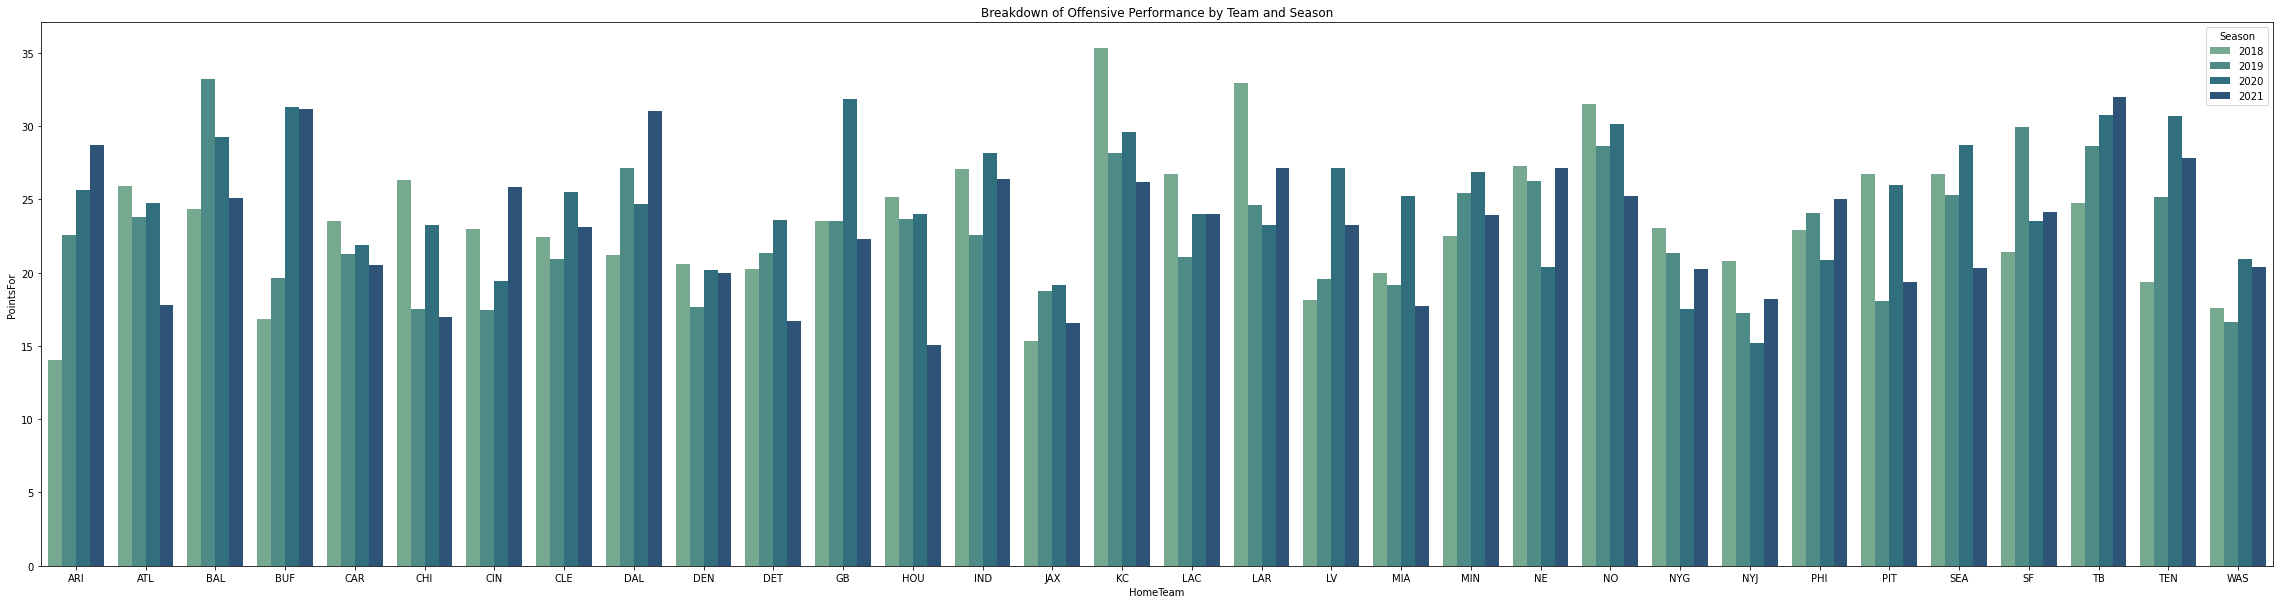

In [8]:
plt.figure(figsize = (40, 10))

sns.barplot(x = home_pf['HomeTeam'],
           y = home_pf.PointsFor,
           data = home_pf,
           hue = home_pf['Season'],
           palette = 'crest')
plt.title('Breakdown of Offensive Performance by Team and Season')
plt.show()

As with defensive production, we gain a lot more information about the offensive performance of a team if we break it down by season.

# Create a timeline of how teams perform offensively and defensively

In [9]:
# Design a function to get the desired data out.

team_performance = pd.DataFrame(columns = ['Season', 'Week', 'Team', 'PointsFor', 
                                                'PointsAgainst', 'YardsFor', 'YardsAgainst'])

for row in range(len(data)):
    team_performance = team_performance.append({'Season': data.iloc[row]['Season'],
                                 'Week': data.iloc[row]['Week'],
                                 'Team': data.iloc[row]['HomeTeam'],
                                 'PointsFor': data.iloc[row]['HomePoints'],
                                 'PointsAgainst': data.iloc[row]['AwayPoints'],
                                 'YardsFor': data.iloc[row]['HomeYards'],
                                 'YardsAgainst': data.iloc[row]['AwayYards']}, ignore_index = True)
    team_performance = team_performance.append({'Season': data.iloc[row]['Season'],
                                 'Week': data.iloc[row]['Week'],
                                 'Team': data.iloc[row]['AwayTeam'],
                                 'PointsFor': data.iloc[row]['AwayPoints'],
                                 'PointsAgainst': data.iloc[row]['HomePoints'],
                                 'YardsFor': data.iloc[row]['AwayYards'],
                                 'YardsAgainst': data.iloc[row]['HomeYards']}, ignore_index = True)

In [10]:
team_performance

,Season,Week,Team,PointsFor,PointsAgainst,YardsFor,YardsAgainst
0,2018,1,PHI,18.0,12.0,232.0,299.0
1,2018,1,ATL,12.0,18.0,299.0,232.0
2,2018,1,NO,40.0,48.0,475.0,529.0
3,2018,1,TB,48.0,40.0,529.0,475.0
4,2018,1,BAL,47.0,3.0,369.0,153.0
...,...,...,...,...,...,...,...
2075,2021,18,SEA,NaN,NaN,NaN,NaN
2076,2021,18,LAR,NaN,NaN,NaN,NaN
2077,2021,18,SF,NaN,NaN,NaN,NaN
2078,2021,18,LV,NaN,NaN,NaN,NaN


[]

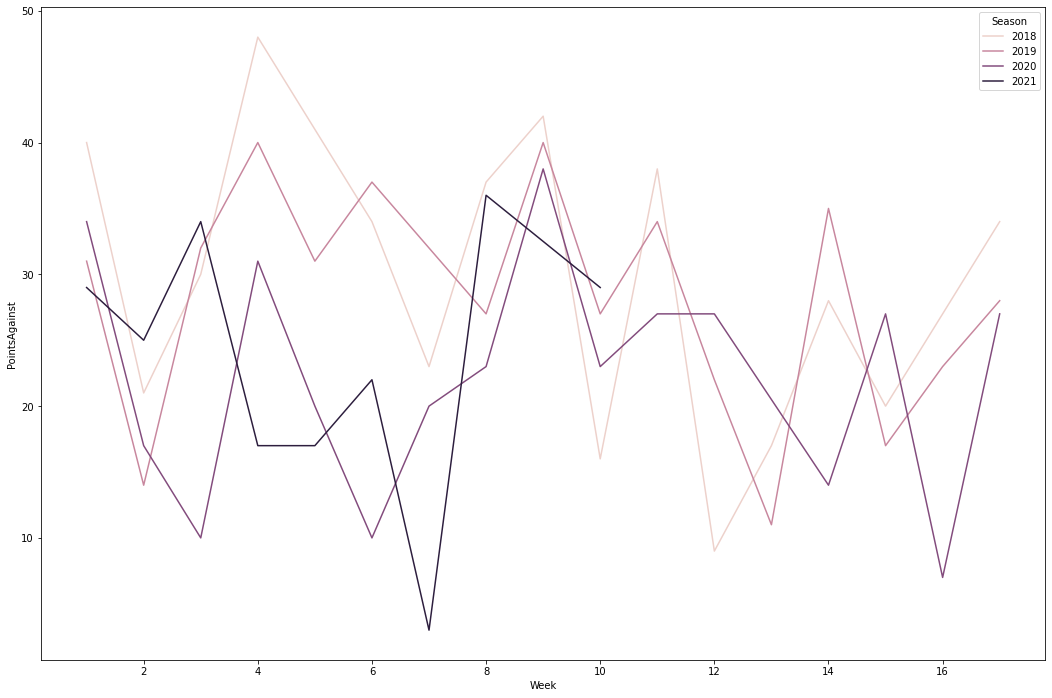

In [14]:
# Plot team offensive performances for 2021

plt.figure(figsize = (18,12))

sns.lineplot(x = team_performance['Week'],
            y = team_performance[team_performance['Team'] == 'TB']['PointsAgainst'],
            hue = team_performance['Season'])
plt.plot()

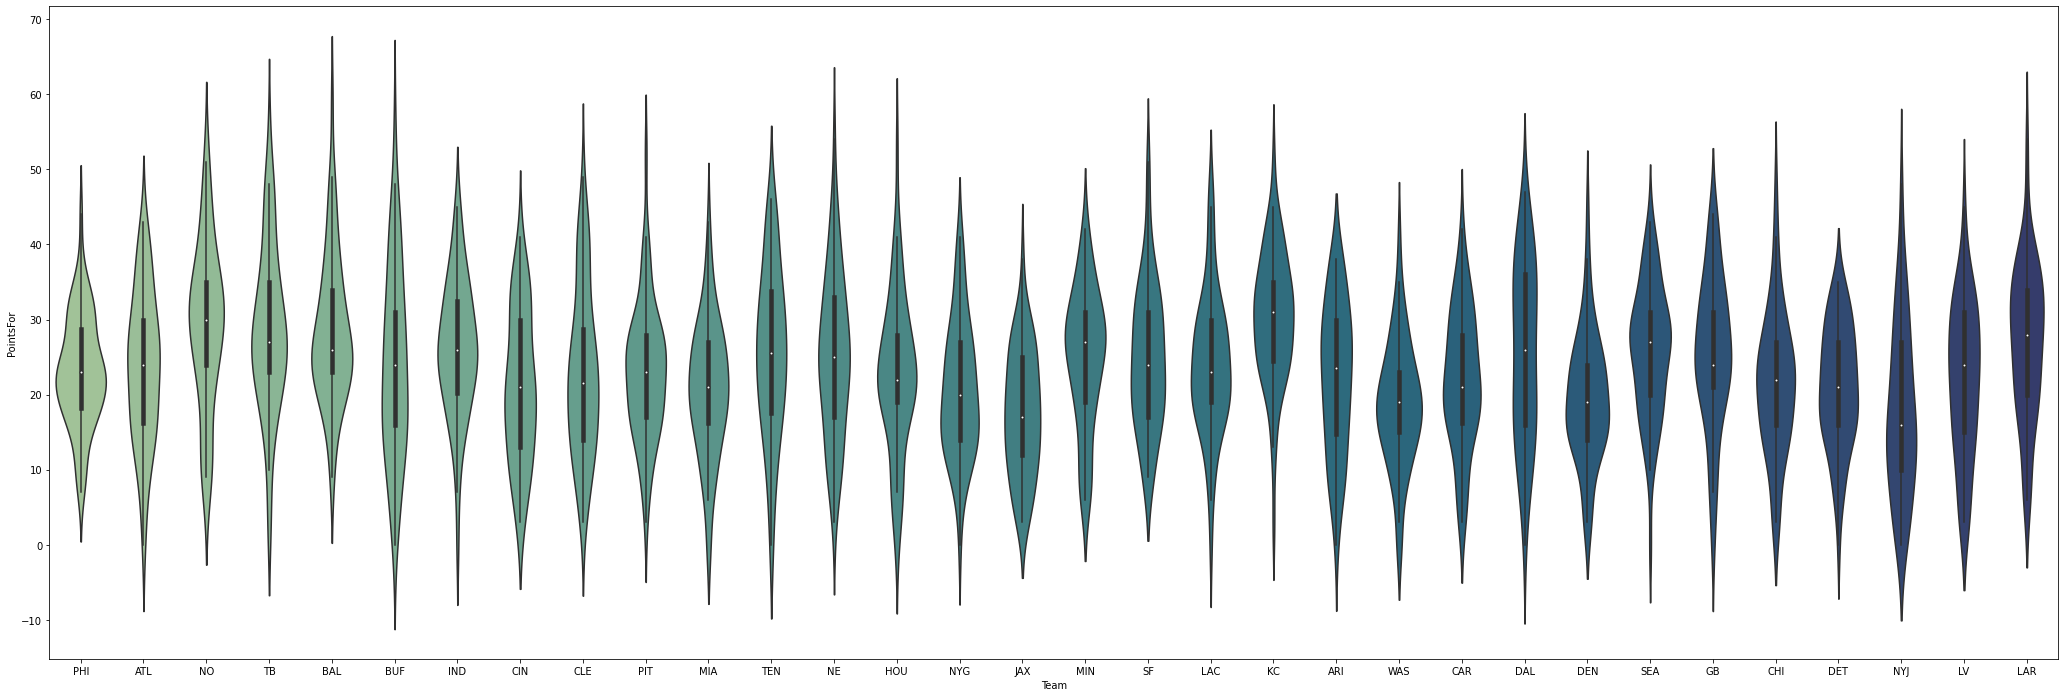

In [12]:
plt.figure(figsize = (36,12))
sns.violinplot(x = team_performance['Team'],
              y = team_performance["PointsFor"],
              palette = 'crest')
plt.show()

In [13]:
team_performance.describe()

,PointsFor,PointsAgainst,YardsFor,YardsAgainst
count,1838.000000,1838.000000,1838.000000,1838.000000
mean,23.564744,23.564744,352.824810,352.824810
std,10.171951,10.171951,87.203351,87.203351
min,0.000000,0.000000,47.000000,47.000000
25%,17.000000,17.000000,292.000000,292.000000
50%,24.000000,24.000000,354.500000,354.500000
75%,30.000000,30.000000,413.000000,413.000000
max,59.000000,59.000000,643.000000,643.000000
